Importing all the necessary libraries...... Target: Saleprice

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [2]:
#reading the data set
train_df=pd.read_csv("C:/Users/samir/OneDrive/Desktop/train.csv")
train_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [4]:
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

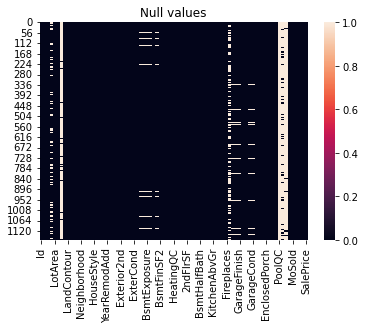

In [5]:
#Ploting the heat map of null values
sns.heatmap(train_df.isnull())
plt.title('Null values')
plt.show()

so our data have null values......Let's deal with null values first

Let's drop the null values because we can not take the mean of LotFrontage,Alley,etc as each house has its own LotFrontage,etc 
soo we can not take the mean and fill the nan.. it is better to drop the nan's

In [6]:
train_df=train_df.dropna(axis=1)
train_df.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0  127         120       RL     4928   Pave      IR1         Lvl    AllPub   
1  889          20       RL    15865   Pave      IR1         Lvl    AllPub   
2  793          60       RL     9920   Pave      IR1         Lvl    AllPub   
3  110          20       RL    11751   Pave      IR1         Lvl    AllPub   
4  422          20       RL    16635   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1    Inside       Mod  ...             0         0         224        0   
2   CulDSac       Gtl  ...             0         0           0        0   
3    Inside       Gtl  ...             0         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2007        WD         Normal    128000  
1       0      10    2007        WD         Normal    268000  
2       0       6    2007        WD         Normal    269790  
3       0       1    2010       COD         Normal    190000  
4       0       6    2009        WD         Normal    215000  

[5 rows x 63 columns]

In [7]:
#droping the id column as its of no use
train_df=train_df.drop('Id',axis=1)
train_df.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0         120       RL     4928   Pave      IR1         Lvl    AllPub   
1          20       RL    15865   Pave      IR1         Lvl    AllPub   
2          60       RL     9920   Pave      IR1         Lvl    AllPub   
3          20       RL    11751   Pave      IR1         Lvl    AllPub   
4          20       RL    16635   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      NPkVill  ...             0         0           0   
1    Inside       Mod        NAmes  ...             0         0         224   
2   CulDSac       Gtl      NoRidge  ...             0         0           0   
3    Inside       Gtl       NWAmes  ...             0         0           0   
4       FR2       Gtl       NWAmes  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0        0       2    2007        WD        Normal    128000  
1        0        0      10    2007        WD        Normal    268000  
2        0        0       6    2007        WD        Normal    269790  
3        0        0       1    2010       COD        Normal    190000  
4        0        0       6    2009        WD        Normal    215000  

[5 rows x 62 columns]

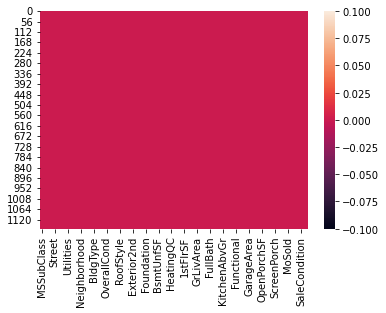

In [8]:
#Now again checking the null values using heatmap
sns.heatmap(train_df.isnull())
plt.show()

Now our dataset is free from null values

In [9]:
#droping all the duplicates data
train_df.drop_duplicates(inplace=True)

In [10]:
#Check the shape of dataset
train_df.shape

(1168, 62)

In [11]:
#let's check the datatype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1168 non-null   int64 
 1   MSZoning       1168 non-null   object
 2   LotArea        1168 non-null   int64 
 3   Street         1168 non-null   object
 4   LotShape       1168 non-null   object
 5   LandContour    1168 non-null   object
 6   Utilities      1168 non-null   object
 7   LotConfig      1168 non-null   object
 8   LandSlope      1168 non-null   object
 9   Neighborhood   1168 non-null   object
 10  Condition1     1168 non-null   object
 11  Condition2     1168 non-null   object
 12  BldgType       1168 non-null   object
 13  HouseStyle     1168 non-null   object
 14  OverallQual    1168 non-null   int64 
 15  OverallCond    1168 non-null   int64 
 16  YearBuilt      1168 non-null   int64 
 17  YearRemodAdd   1168 non-null   int64 
 18  RoofStyle      1168 non-null

our data have 28 object datatype 
first we have to change it in float

In [12]:
#Using LebelEncoder to cahange the str datatype
leb=LabelEncoder()
for column in train_df.columns:
    if train_df[column].dtype==np.number:
        continue
    train_df[column]=leb.fit_transform(train_df[column])

In [13]:
train_df

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0             11         3       80       1         0            3          0   
1              0         3      808       1         0            3          0   
2              5         3      449       1         0            3          0   
3              0         3      632       1         0            3          0   
4              0         3      821       1         0            3          0   
...          ...       ...      ...     ...       ...          ...        ...   
1163           0         3      438       1         0            3          0   
1164           0         3      313       1         3            3          0   
1165          12         3       15       1         3            3          0   
1166           6         0      280       1         3            3          0   
1167           5         3      219       1         0            3          0   

      LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  3SsnPorch  \
0             4          0            13  ...              0          0   
1             4          1            12  ...              0          0   
2             1          0            15  ...              0          0   
3             4          0            14  ...              0          0   
4             2          0            14  ...              0          0   
...         ...        ...           ...  ...            ...        ...   
1163          4          0            19  ...              0          0   
1164          4          0             7  ...              0          0   
1165          2          0            13  ...              0          0   
1166          4          0             9  ...             58          0   
1167          4          0             8  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       1       1         8              4   
1              48         0        0       9       1         8              4   
2               0         0        0       5       1         8              4   
3               0         0        0       0       4         0              4   
4               0         0        0       5       3         8              4   
...           ...       ...      ...     ...     ...       ...            ...   
1163            0         0        0       1       4         8              4   
1164            0         0        0       4       3         8              4   
1165            0         0        0       6       3         8              4   
1166            0         0        0       6       2         8              4   
1167            0         0        0       5       0         8              4   

      SalePrice  
0           129  
1           468  
2           470  
3           326  
4           379  
...         ...  
1163        114  
1164         76  
1165        200  
1166          4  
1167        306  

[1168 rows x 62 columns]

In [14]:
train_df.shape

(1168, 62)

In [15]:
train_df.describe()

MSSubClass     MSZoning      LotArea       Street     LotShape  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      4.166096     3.013699   414.643836     0.996575     1.938356   
std       4.139986     0.633120   249.993254     0.058445     1.412262   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     3.000000   197.750000     1.000000     0.000000   
50%       4.000000     3.000000   407.500000     1.000000     3.000000   
75%       6.000000     3.000000   618.250000     1.000000     3.000000   
max      14.000000     4.000000   891.000000     1.000000     3.000000   

       LandContour  Utilities    LotConfig    LandSlope  Neighborhood  ...  \
count  1168.000000     1168.0  1168.000000  1168.000000   1168.000000  ...   
mean      2.773973        0.0     3.004281     0.064212     12.145548  ...   
std       0.710027        0.0     1.642667     0.284088      6.010364  ...   
min       0.000000        0.0     0.000000     0.000000      0.000000  ...   
25%       3.000000        0.0     2.000000     0.000000      7.000000  ...   
50%       3.000000        0.0     4.000000     0.000000     12.000000  ...   
75%       3.000000        0.0     4.000000     0.000000     17.000000  ...   
max       3.000000        0.0     4.000000     2.000000     24.000000  ...   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea      MiscVal  \
count    1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean        7.361301     0.166952     2.630993     0.023973     0.299658   
std        20.842115     1.351138    10.103236     0.345529     1.834432   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%         0.000000     0.000000     0.000000     0.000000     0.000000   
50%         0.000000     0.000000     0.000000     0.000000     0.000000   
75%         0.000000     0.000000     0.000000     0.000000     0.000000   
max       105.000000    17.000000    64.000000     7.000000    19.000000   

            MoSold       YrSold     SaleType  SaleCondition    SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000  
mean      5.344178     1.804795     7.465753       3.768836   261.805651  
std       2.686352     1.329738     1.619459       1.112208   149.862407  
min       0.000000     0.000000     0.000000       0.000000     0.000000  
25%       4.000000     1.000000     8.000000       4.000000   137.750000  
50%       5.000000     2.000000     8.000000       4.000000   245.500000  
75%       7.000000     3.000000     8.000000       4.000000   379.000000  
max      11.000000     4.000000     8.000000       5.000000   580.000000  

[8 rows x 62 columns]

now as we changed the datatype let's check the correlation graph , outlers and see the data dristibution graph

In [16]:
train_df.corr()

MSSubClass  MSZoning   LotArea    Street  LotShape  \
MSSubClass       1.000000  0.013516 -0.289010 -0.029520  0.076645   
MSZoning         0.013516  1.000000 -0.050498  0.140215  0.053655   
LotArea         -0.289010 -0.050498  1.000000 -0.059142 -0.305133   
Street          -0.029520  0.140215 -0.059142  1.000000 -0.012941   
LotShape         0.076645  0.053655 -0.305133 -0.012941  1.000000   
...                   ...       ...       ...       ...       ...   
MoSold           0.005488 -0.051646  0.012867 -0.008860 -0.050418   
YrSold          -0.039245 -0.004964 -0.041749 -0.019635  0.021421   
SaleType         0.045454  0.079854 -0.033343  0.025920 -0.015161   
SaleCondition   -0.033527  0.004501  0.057748  0.014176 -0.054905   
SalePrice       -0.015062 -0.198318  0.449715  0.049819 -0.287903   

               LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
MSSubClass       -0.021033        NaN   0.066929  -0.022919      0.009875   
MSZoning          0.001175        NaN  -0.027246  -0.023952     -0.251833   
LotArea          -0.017495        NaN  -0.202196   0.117370      0.093021   
Street            0.105226        NaN   0.000153  -0.141572      0.001420   
LotShape          0.081803        NaN   0.211395  -0.101187     -0.031852   
...                    ...        ...        ...        ...           ...   
MoSold           -0.023872        NaN   0.019084   0.030526      0.023378   
YrSold            0.009499        NaN  -0.009817  -0.005352      0.026181   
SaleType         -0.041763        NaN  -0.002039   0.056004     -0.023081   
SaleCondition     0.047715        NaN   0.043692  -0.061461      0.042340   
SalePrice         0.032355        NaN  -0.061521   0.029216      0.177082   

               ...  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
MSSubClass     ...       0.004240  -0.047855    -0.003655  0.019977 -0.030254   
MSZoning       ...       0.108786   0.003334     0.023698 -0.001502  0.011956   
LotArea        ...      -0.006930   0.076288     0.071519  0.076404  0.075370   
Street         ...       0.020713   0.007247     0.015272  0.004069 -0.134283   
LotShape       ...       0.071237  -0.018852    -0.057627 -0.023309 -0.021309   
...            ...            ...        ...          ...       ...       ...   
MoSold         ...      -0.029297   0.019804     0.036193 -0.022744  0.018699   
YrSold         ...      -0.005554   0.011001     0.017659 -0.064406  0.020136   
SaleType       ...      -0.008976  -0.021077     0.006690  0.019845  0.010380   
SaleCondition  ...      -0.075057  -0.004518     0.001553 -0.068069  0.012981   
SalePrice      ...      -0.126661   0.078472     0.112506  0.063553 -0.021931   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
MSSubClass     0.005488 -0.039245  0.045454      -0.033527  -0.015062  
MSZoning      -0.051646 -0.004964  0.079854       0.004501  -0.198318  
LotArea        0.012867 -0.041749 -0.033343       0.057748   0.449715  
Street        -0.008860 -0.019635  0.025920       0.014176   0.049819  
LotShape      -0.050418  0.021421 -0.015161      -0.054905  -0.287903  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.144536 -0.063667      -0.003462   0.098652  
YrSold        -0.144536  1.000000  0.013606       0.024505  -0.041436  
SaleType      -0.063667  0.013606  1.000000       0.143557  -0.032473  
SaleCondition -0.003462  0.024505  0.143557       1.000000   0.245379  
SalePrice      0.098652 -0.041436 -0.032473       0.245379   1.000000  

[62 rows x 62 columns]

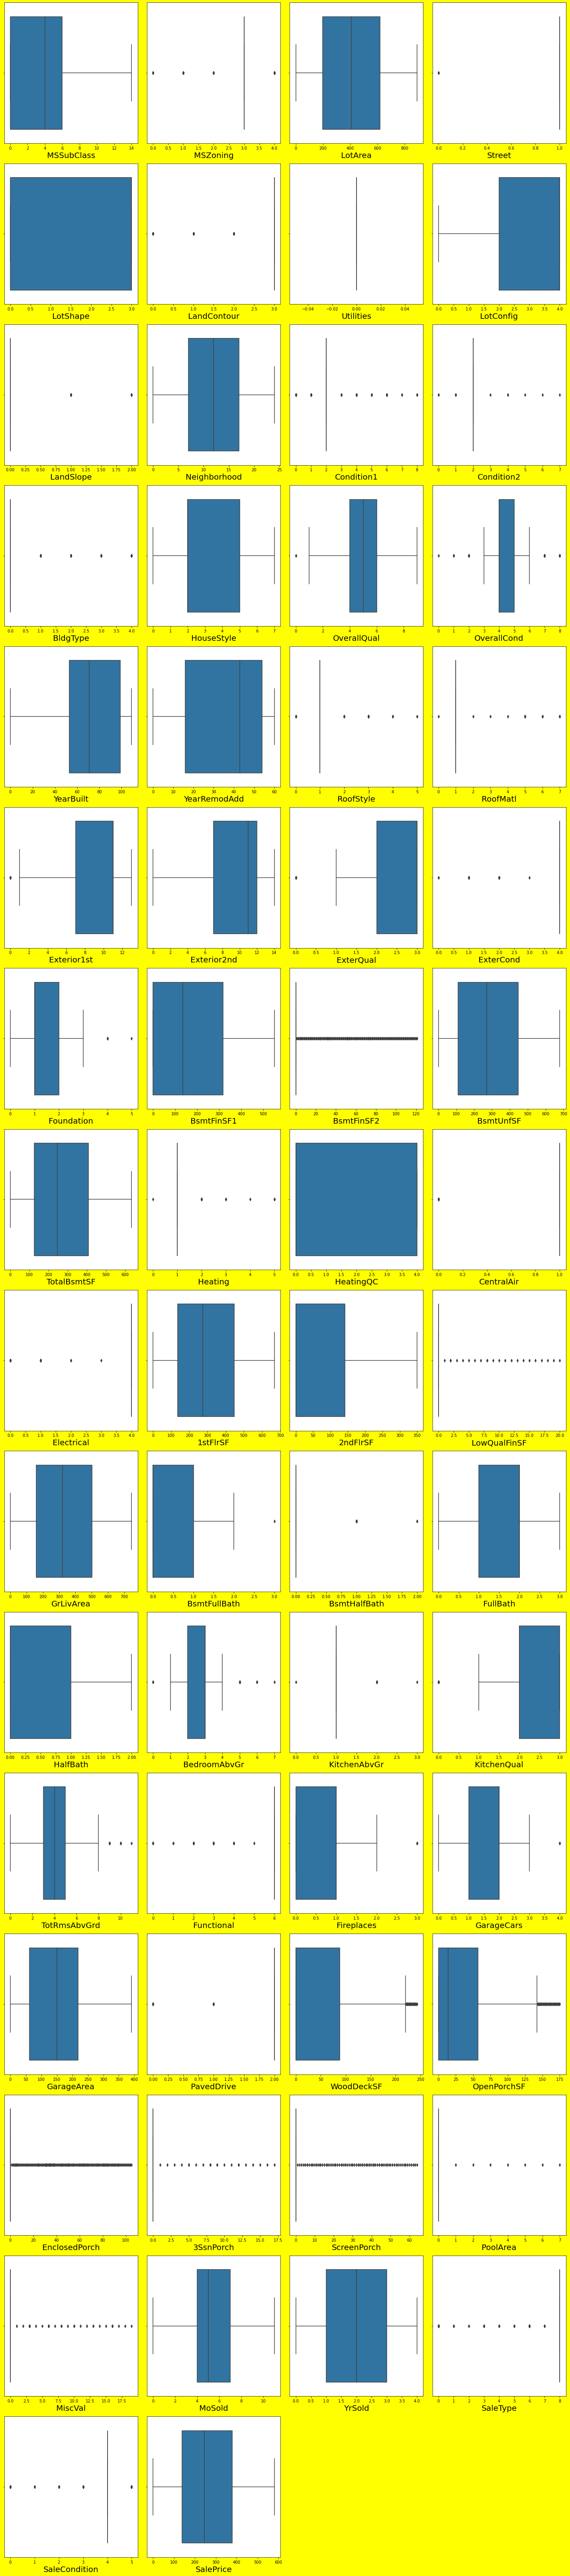

In [17]:
#Lets check the outlier for each column using boxplot
plt.figure(figsize=(20,90),facecolor='yellow')
plotnumber=1
for column in train_df:
    if plotnumber<=62:
        ax=plt.subplot(16,4,plotnumber)
        sns.boxplot(train_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

as we can see our data have have soo many outliers but we will not remove the outliers because we are working to predict house
sale price so definately the house with more square area and more flats,etc will cost more than the normal house price

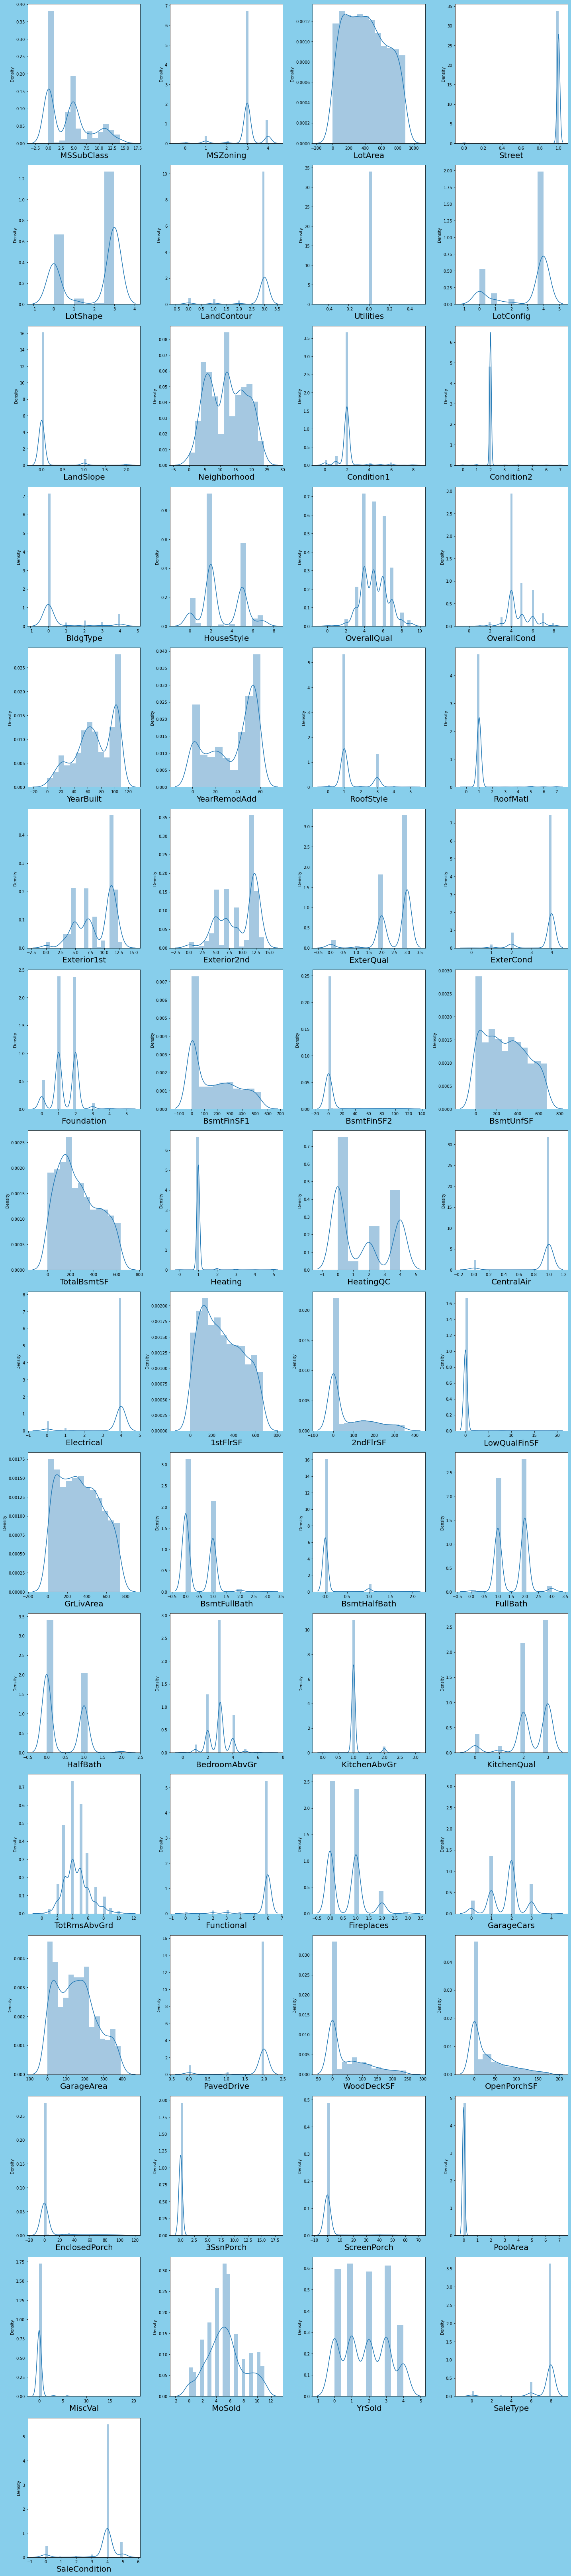

In [18]:
#Lets see hw data is distributed for each column
plt.figure(figsize=(20,90),facecolor='skyblue')
plotnumber=1
for column in train_df:
    if plotnumber<62:
        ax=plt.subplot(16,4,plotnumber)
        sns.distplot(train_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

as we can see our dataset ave skewness, so first let's deal with it

In [19]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [20]:
features=['MSSubClass','MSZoning','LotShape','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
         'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtFinSF1','BsmtFinSF2','Heating','HeatingQC','CentralAir','Electrical',
         '2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','Functional','Fireplaces','GarageCars',
         'PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SaleType','SaleCondition']

In [21]:
#Using Yeo-Johnson to deal with skewness beacuse our dataset have both +ve and-ve skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [22]:
train_df[features]=pt.fit_transform(train_df[features])

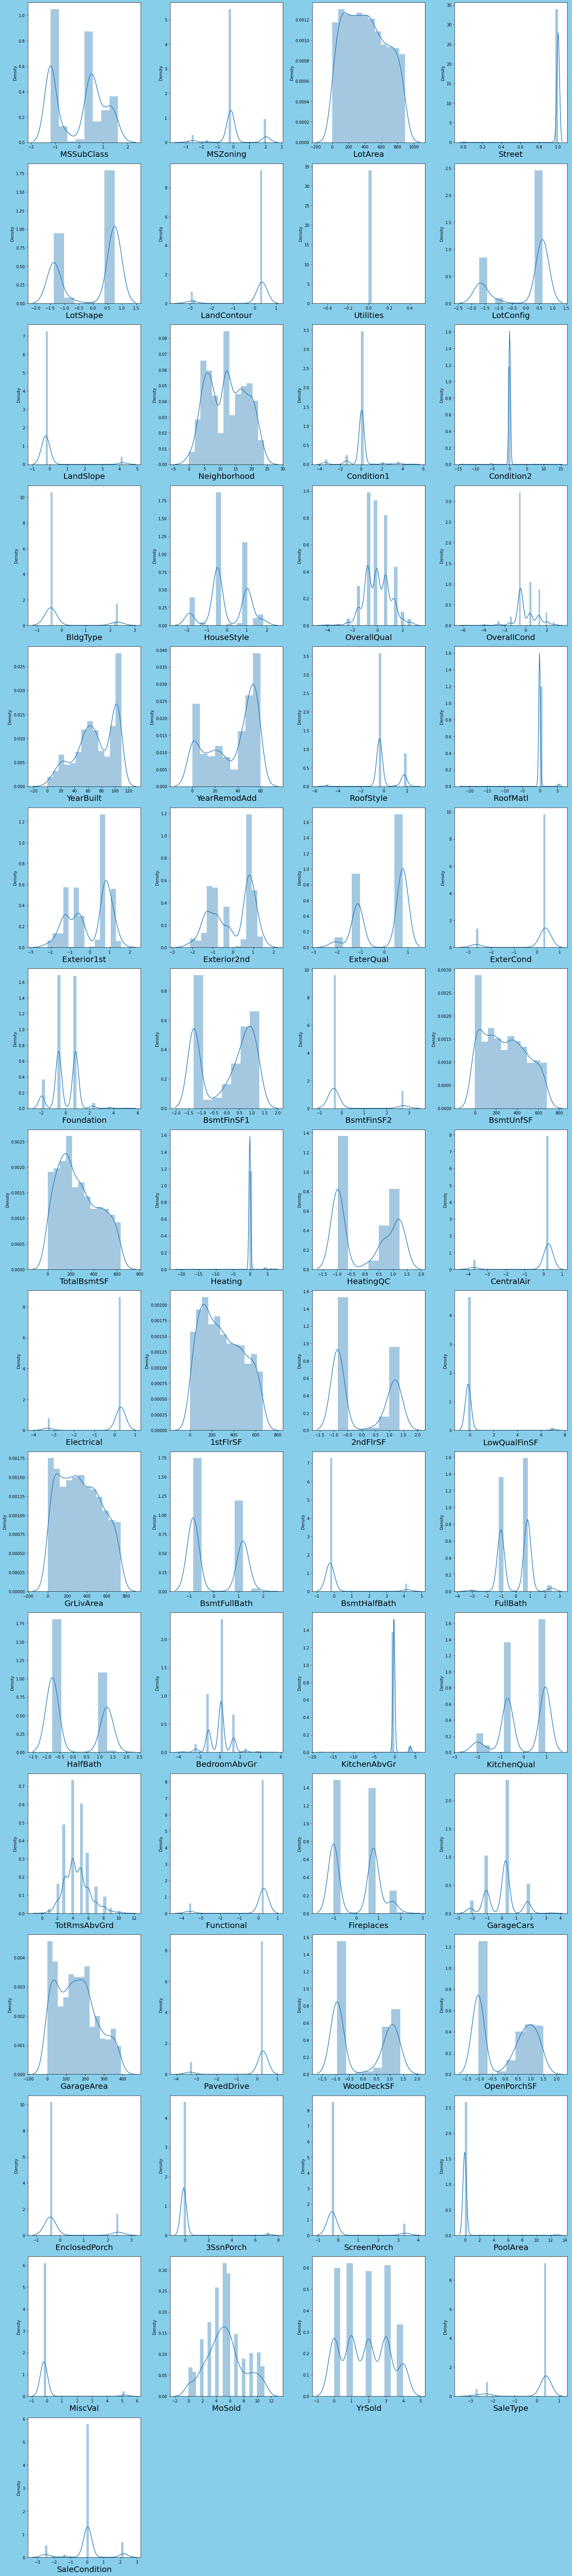

In [23]:
#Lets see hw data is distributed for each column after applyinh yeo-johnson
plt.figure(figsize=(20,90),facecolor='skyblue')
plotnumber=1
for column in train_df:
    if plotnumber<62:
        ax=plt.subplot(16,4,plotnumber)
        sns.distplot(train_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Working on test dataset

In [24]:
test_df=pd.read_csv("C:\\Users\\samir\\OneDrive\\Desktop\\test.csv")
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [25]:
test_df=test_df.dropna(axis=1)
test_df.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   337          20       RL    14157   Pave      IR1         HLS    AllPub   
1  1018         120       RL     5814   Pave      IR1         Lvl    AllPub   
2   929          20       RL    11838   Pave      Reg         Lvl    AllPub   
3  1148          70       RL    12000   Pave      Reg         Bnk    AllPub   
4  1227          60       RL    14598   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch  \
0    Corner       Gtl  ...          51             0         0           0   
1   CulDSac       Gtl  ...           0             0         0           0   
2    Inside       Gtl  ...         151             0         0           0   
3    Inside       Gtl  ...           0             0         0           0   
4   CulDSac       Gtl  ...          18             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0        0        0       7    2007        WD        Normal  
1        0        0       8    2009       COD       Abnorml  
2        0        0       6    2009        WD        Normal  
3        0        0       7    2009        WD        Normal  
4        0        0       1    2008        WD        Normal  

[5 rows x 61 columns]

In [26]:
#droping the id column as its of no use
test_df=test_df.drop('Id',axis=1)
test_df.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          20       RL    14157   Pave      IR1         HLS    AllPub   
1         120       RL     5814   Pave      IR1         Lvl    AllPub   
2          20       RL    11838   Pave      Reg         Lvl    AllPub   
3          70       RL    12000   Pave      Reg         Bnk    AllPub   
4          60       RL    14598   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    Corner       Gtl      StoneBr  ...          51             0         0   
1   CulDSac       Gtl      StoneBr  ...           0             0         0   
2    Inside       Gtl      CollgCr  ...         151             0         0   
3    Inside       Gtl      Crawfor  ...           0             0         0   
4   CulDSac       Gtl      Somerst  ...          18             0         0   

  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  
0           0         0        0       7    2007       WD        Normal  
1           0         0        0       8    2009      COD       Abnorml  
2           0         0        0       6    2009       WD        Normal  
3           0         0        0       7    2009       WD        Normal  
4           0         0        0       1    2008       WD        Normal  

[5 rows x 60 columns]

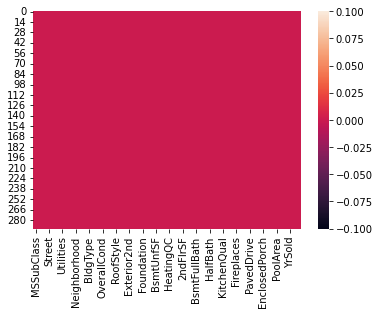

In [27]:
#Now again checking the null values using heatmap
sns.heatmap(test_df.isnull())
plt.show()

In [28]:
#droping all the duplicates data
test_df.drop_duplicates(inplace=True)

In [29]:
#Check the shape of dataset
test_df.shape

(292, 60)

In [30]:
#Using LebelEncoder to cahange the str datatype
leb=LabelEncoder()
for column in test_df.columns:
    if test_df[column].dtype==np.number:
        continue
    test_df[column]=leb.fit_transform(test_df[column])
test_df

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0             0         2      215       1         0            1          0   
1            11         2       34       1         0            3          0   
2             0         2      180       1         3            3          0   
3             6         2      185       1         3            0          0   
4             5         2      220       1         0            3          0   
..          ...       ...      ...     ...       ...          ...        ...   
287           0         2      139       1         3            3          0   
288           0         2      115       1         1            3          0   
289           0         2      165       1         0            3          0   
290           4         3       24       1         3            3          0   
291          12         3        4       1         3            3          0   

     LotConfig  LandSlope  Neighborhood  ...  OpenPorchSF  EnclosedPorch  \
0            0          0            21  ...           27              0   
1            1          0            21  ...            0              0   
2            4          0             4  ...           72              0   
3            4          0             5  ...            0              0   
4            1          0            20  ...            3              0   
..         ...        ...           ...  ...          ...            ...   
287          4          0            20  ...           55              0   
288          4          0             4  ...            0              0   
289          1          0            11  ...            0              0   
290          0          0             2  ...            6              4   
291          4          0             1  ...            0              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0            0            0         0        0       6       1         5   
1            0            0         0        0       7       3         0   
2            0            0         0        0       5       3         5   
3            0            0         0        0       6       3         5   
4            0            0         0        0       0       2         5   
..         ...          ...       ...      ...     ...     ...       ...   
287          0            0         0        0       9       2         5   
288          0            0         0        0       1       2         5   
289          0            0         0        6       2       4         5   
290          0            0         0        0       9       0         5   
291          0            0         0        0       5       0         5   

     SaleCondition  
0                2  
1                0  
2                2  
3                2  
4                2  
..             ...  
287              2  
288              2  
289              2  
290              2  
291              2  

[292 rows x 60 columns]

In [31]:
test_df.shape

(292, 60)

In [32]:
test_df.describe()

MSSubClass    MSZoning     LotArea      Street    LotShape  \
count  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     4.167808    2.136986  116.904110    0.993151    1.958904   
std      4.255894    0.478114   71.619732    0.082618    1.398953   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   54.000000    1.000000    0.000000   
50%      4.000000    2.000000  113.000000    1.000000    3.000000   
75%      6.000000    2.000000  177.250000    1.000000    3.000000   
max     14.000000    3.000000  248.000000    1.000000    3.000000   

       LandContour   Utilities   LotConfig   LandSlope  Neighborhood  ...  \
count   292.000000  292.000000  292.000000  292.000000    292.000000  ...   
mean      2.791096    0.003425    3.078767    0.054795     11.681507  ...   
std       0.699182    0.058521    1.541174    0.242576      6.004975  ...   
min       0.000000    0.000000    0.000000    0.000000      0.000000  ...   
25%       3.000000    0.000000    2.000000    0.000000      6.000000  ...   
50%       3.000000    0.000000    4.000000    0.000000     11.000000  ...   
75%       3.000000    0.000000    4.000000    0.000000     16.000000  ...   
max       3.000000    1.000000    4.000000    2.000000     23.000000  ...   

       OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  PoolArea  \
count   292.000000     292.000000  292.000000   292.000000     292.0   
mean     21.506849       2.335616    0.010274     0.729452       0.0   
std      26.421965       6.970510    0.130676     3.059337       0.0   
min       0.000000       0.000000    0.000000     0.000000       0.0   
25%       0.000000       0.000000    0.000000     0.000000       0.0   
50%       9.500000       0.000000    0.000000     0.000000       0.0   
75%      40.000000       0.000000    0.000000     0.000000       0.0   
max      91.000000      35.000000    2.000000    20.000000       0.0   

          MiscVal      MoSold      YrSold    SaleType  SaleCondition  
count  292.000000  292.000000  292.000000  292.000000     292.000000  
mean     0.130137    5.232877    1.859589    4.828767       1.914384  
std      0.784416    2.774556    1.322867    0.744829       0.576932  
min      0.000000    0.000000    0.000000    0.000000       0.000000  
25%      0.000000    3.000000    1.000000    5.000000       2.000000  
50%      0.000000    5.000000    2.000000    5.000000       2.000000  
75%      0.000000    7.000000    3.000000    5.000000       2.000000  
max      7.000000   11.000000    4.000000    5.000000       3.000000  

[8 rows x 60 columns]

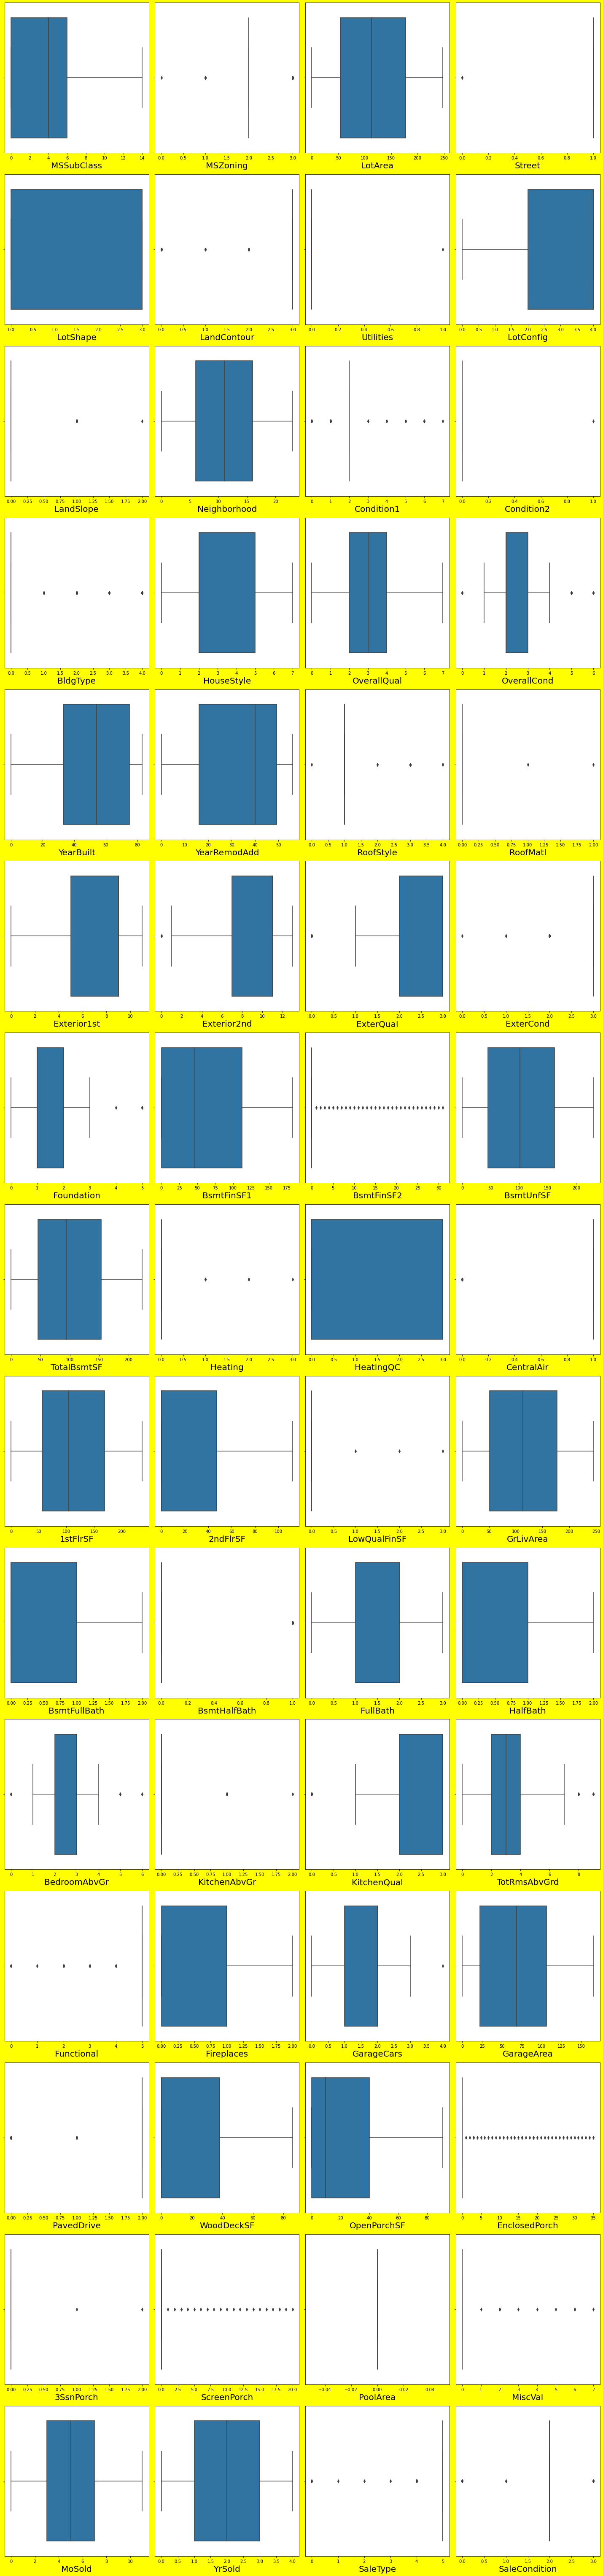

In [33]:
#Lets check the outlier for each column using boxplot
plt.figure(figsize=(20,90),facecolor='yellow')
plotnumber=1
for column in test_df:
    if plotnumber<=62:
        ax=plt.subplot(16,4,plotnumber)
        sns.boxplot(test_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

as we can see our data have have soo many outliers but we will not remove the outliers because we are working to predict house
sale price so definately the house with more square area and more flats,etc will cost more than the normal house price

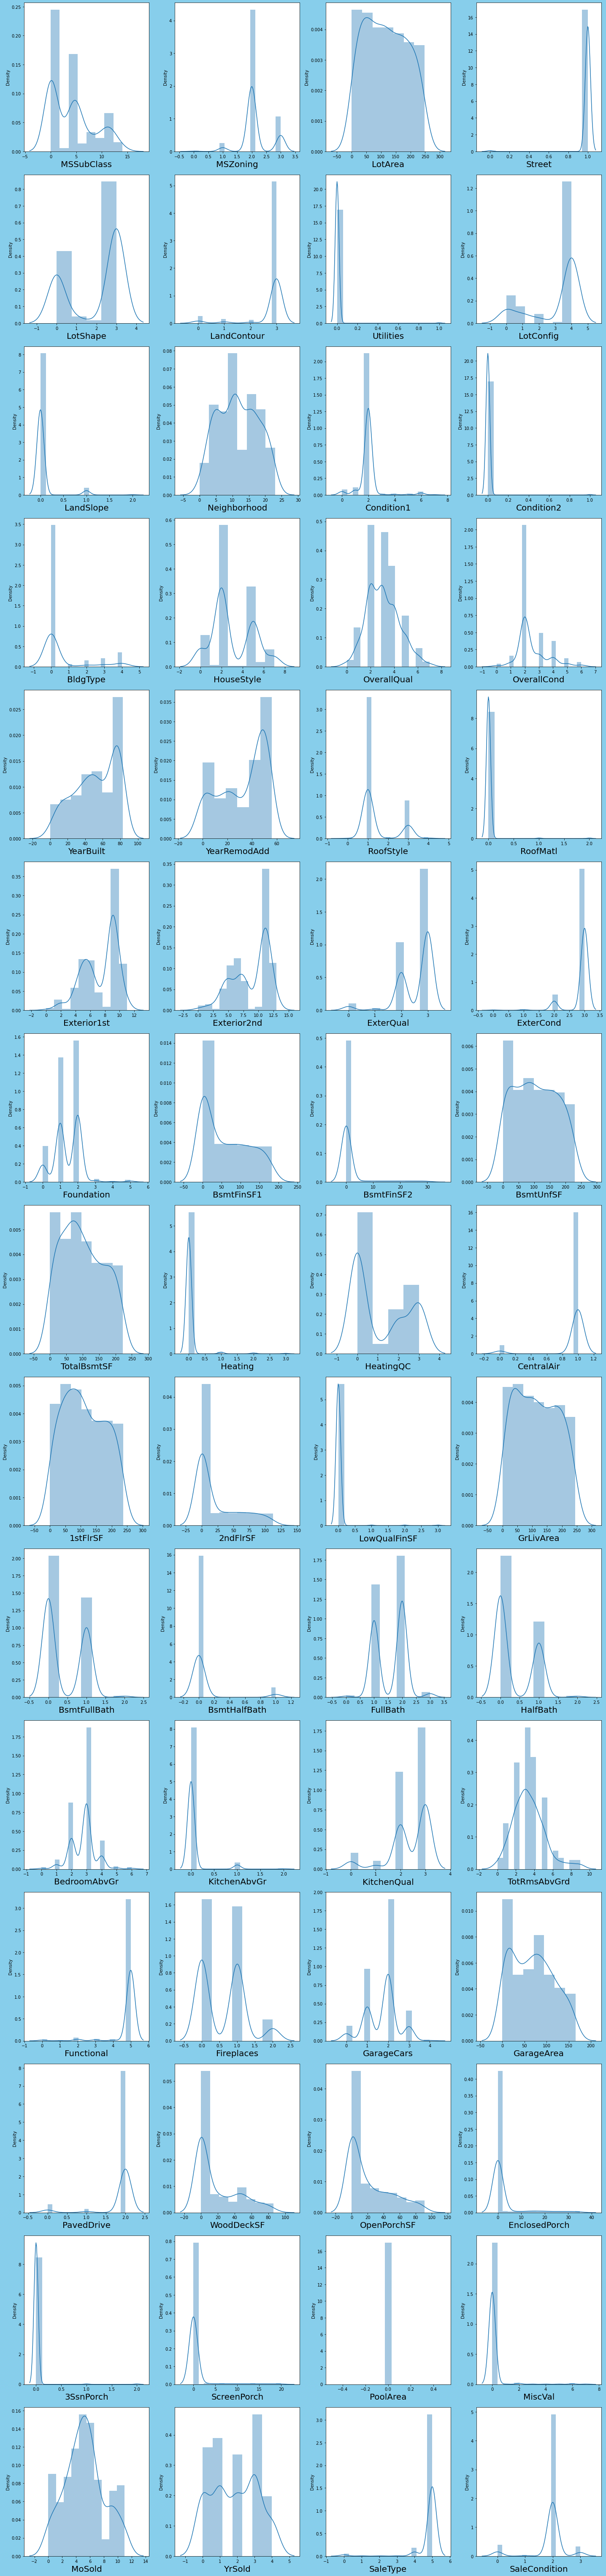

In [34]:
#Lets see hw data is distributed for each column
plt.figure(figsize=(20,90),facecolor='skyblue')
plotnumber=1
for column in test_df:
    if plotnumber<62:
        ax=plt.subplot(16,4,plotnumber)
        sns.distplot(test_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [35]:
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [36]:
features=['MSSubClass','MSZoning','LotShape','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
         'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtFinSF1','BsmtFinSF2','Heating','HeatingQC','CentralAir',
         '2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','Functional','Fireplaces','GarageCars',
         'PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SaleType','SaleCondition']

In [37]:
#Using Yeo-Johnson to deal with skewness beacuse our dataset have both +ve and-ve skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

test_df[features]=pt.fit_transform(test_df[features])

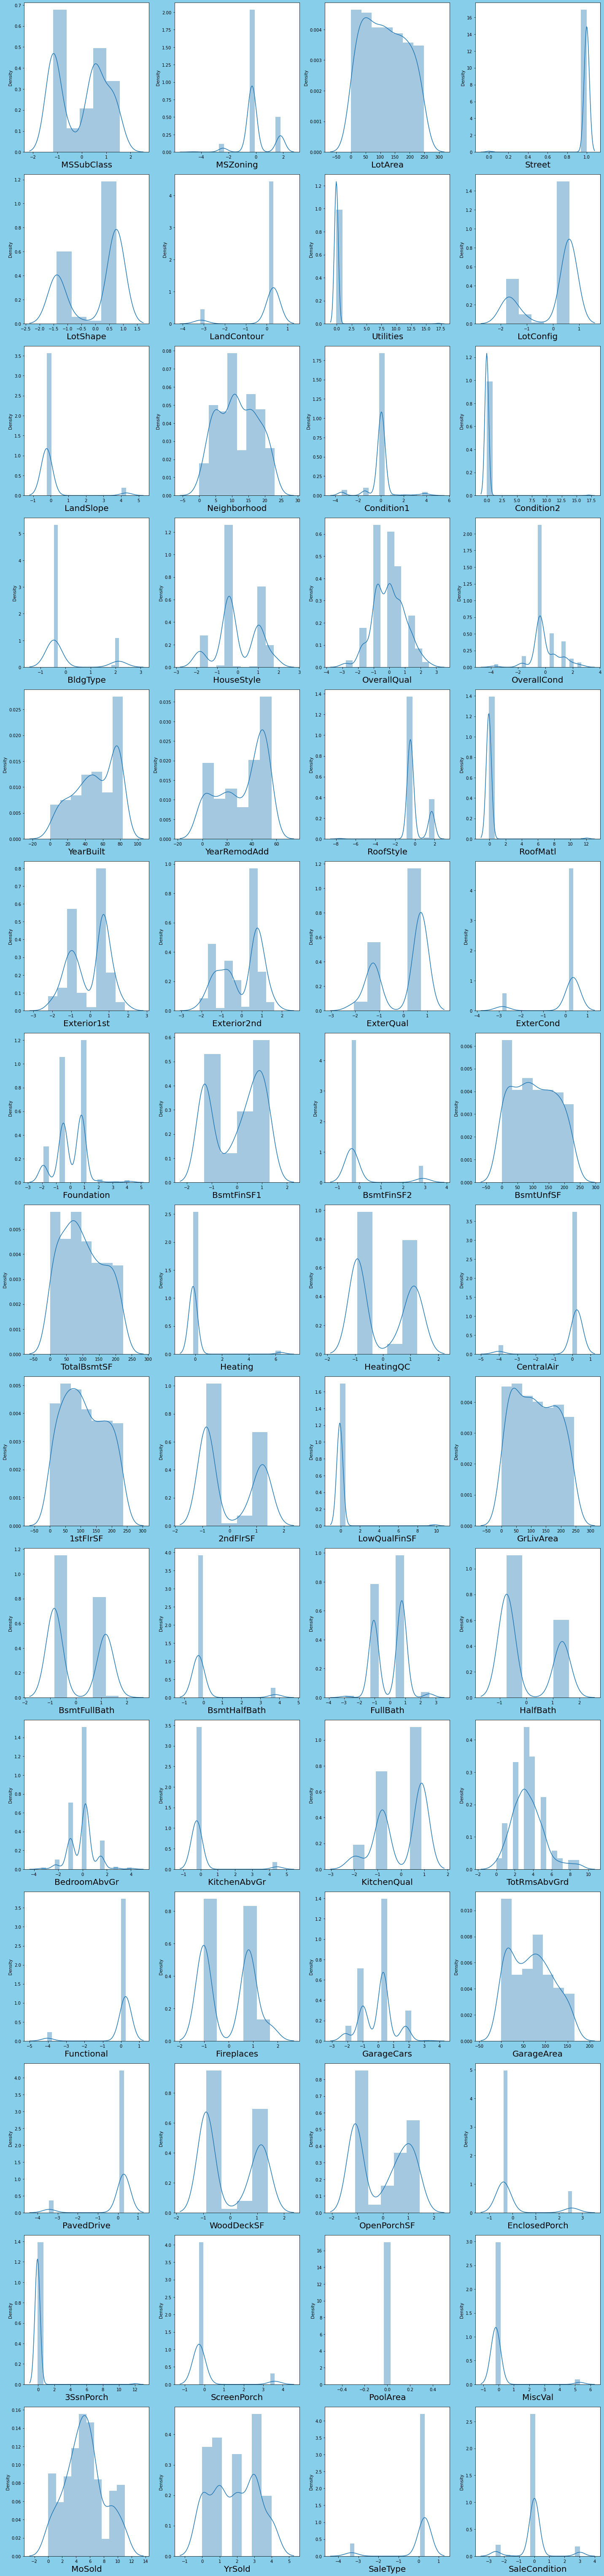

In [38]:
#Lets see hw data is distributed for each column after applyinh yeo-johnson
plt.figure(figsize=(20,90),facecolor='skyblue')
plotnumber=1
for column in test_df:
    if plotnumber<62:
        ax=plt.subplot(16,4,plotnumber)
        sns.distplot(test_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Feature selection and model fitting 

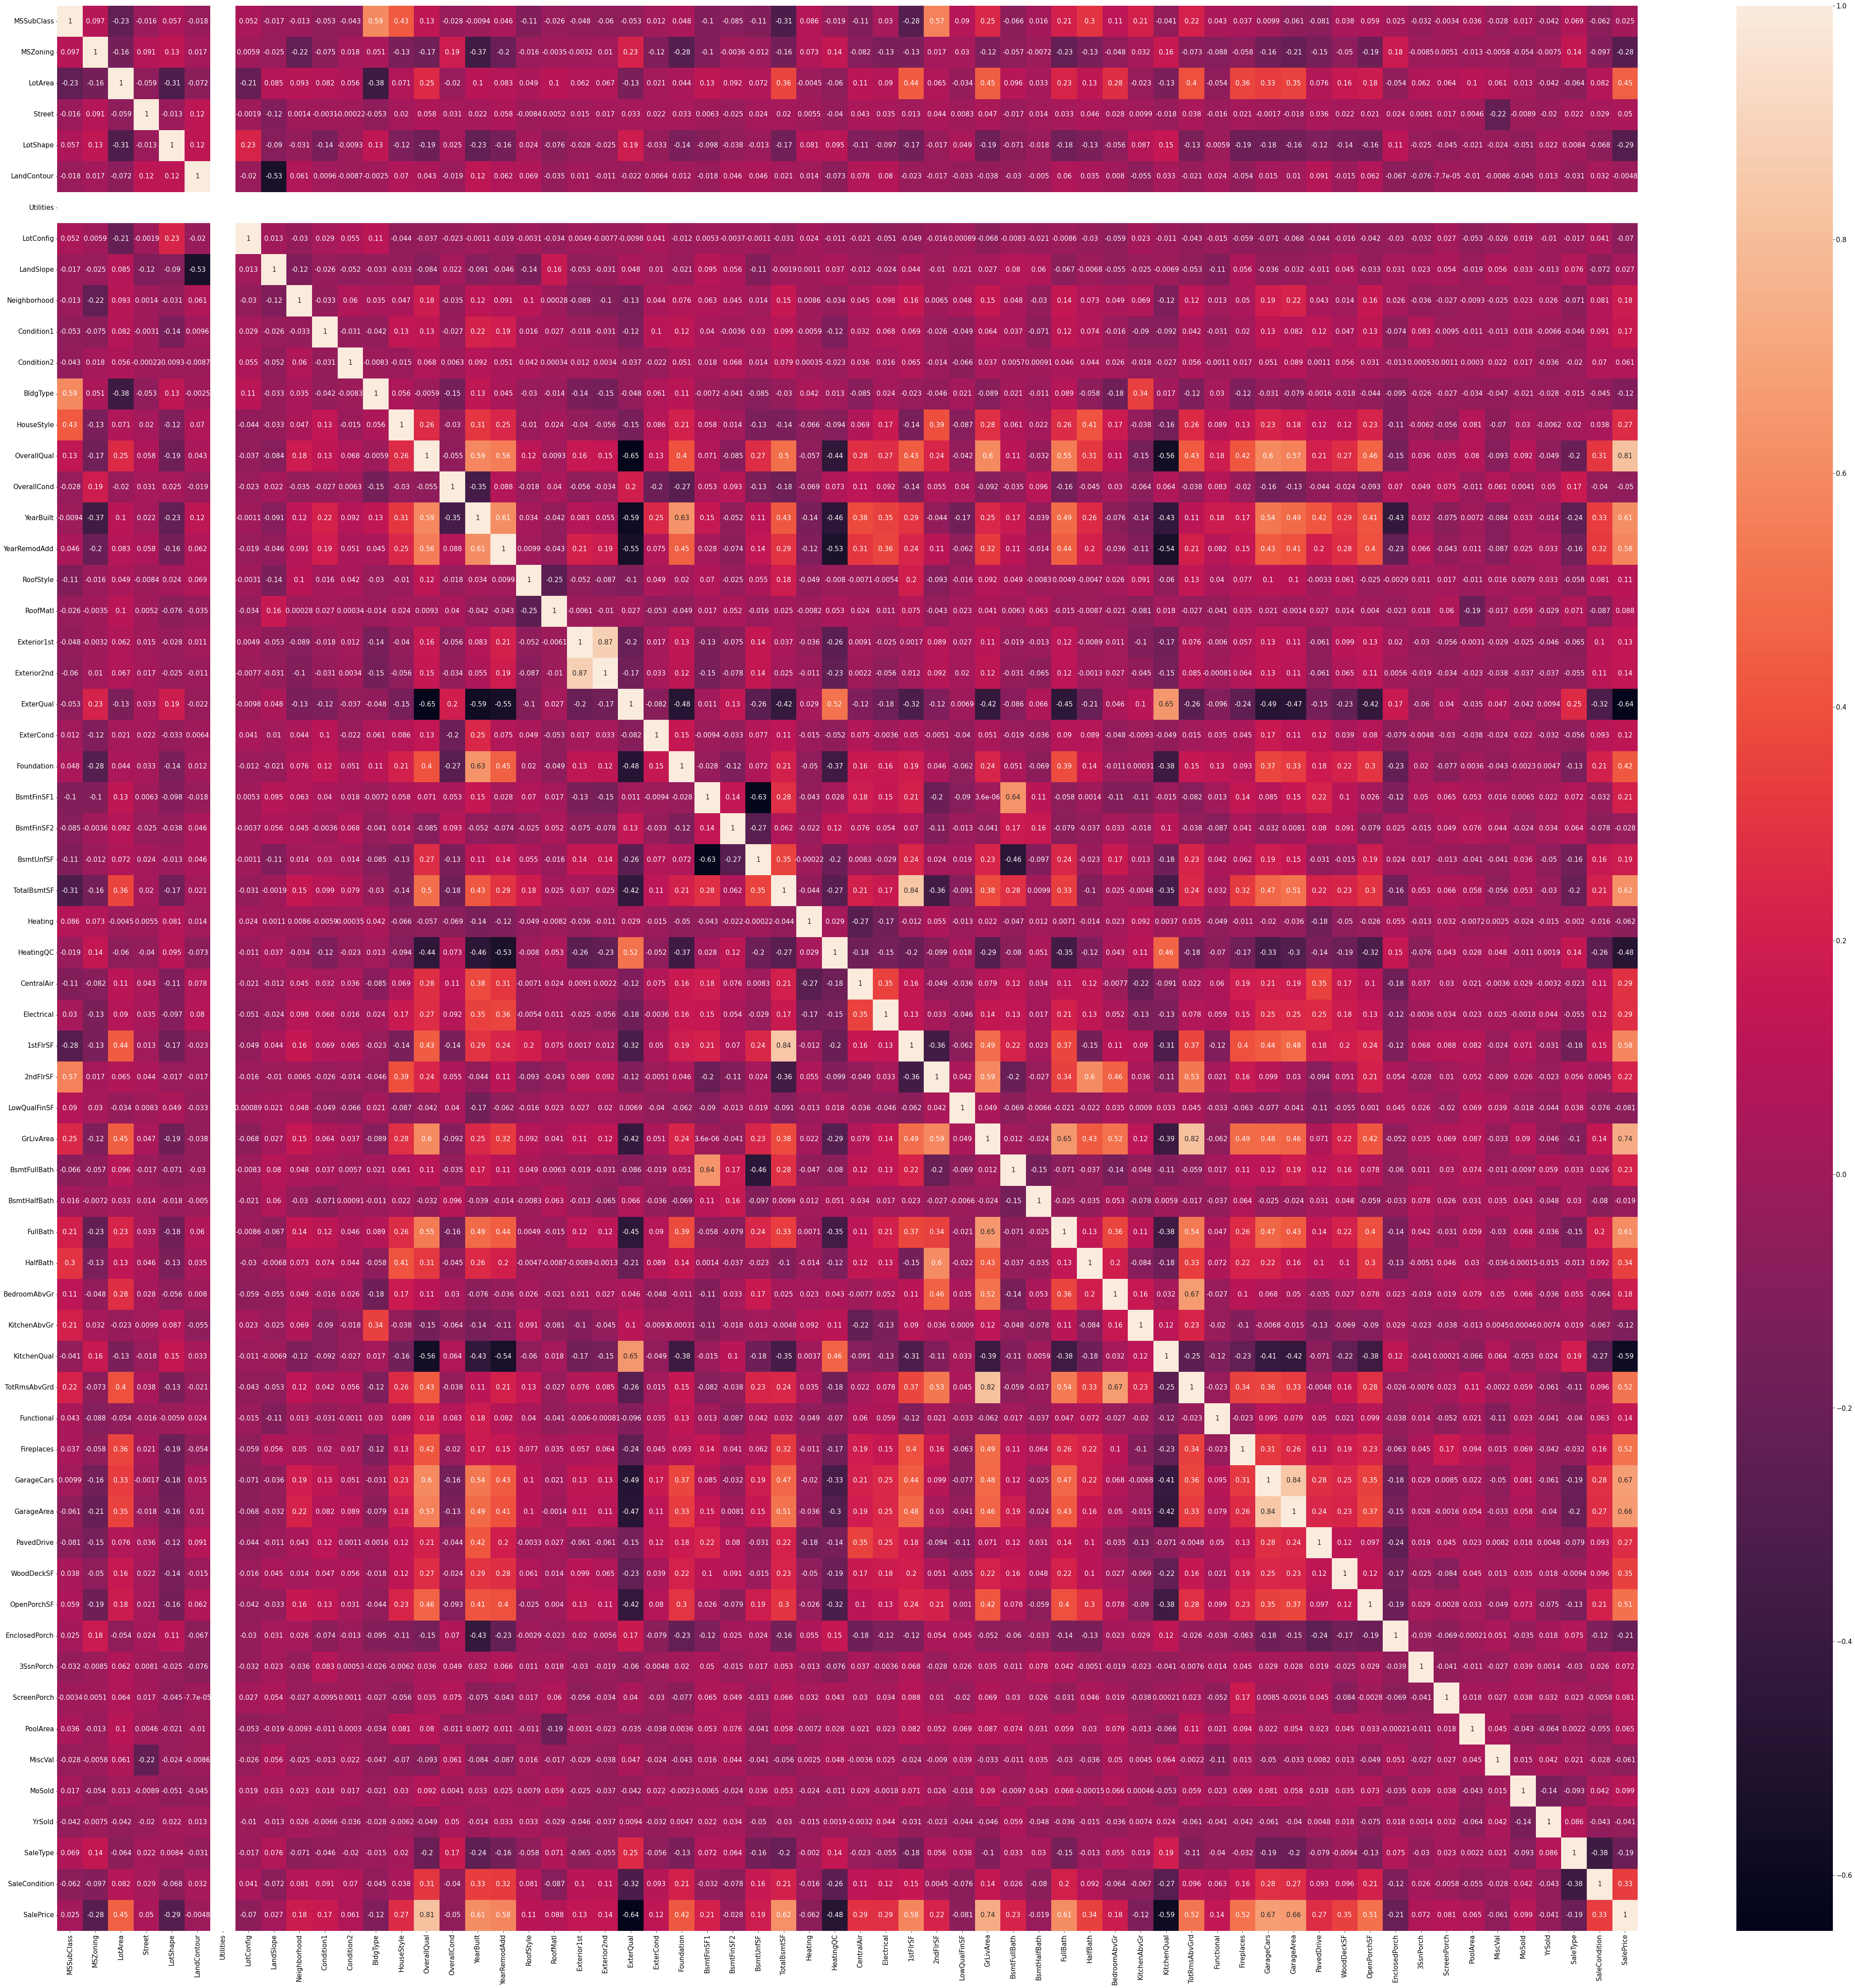

In [39]:
#Finding the correlation between independent and dependent attributes
plt.figure(figsize=(80,80))
plt.rcParams['font.size'] = 15
sns.heatmap(train_df.corr(),annot=True)
plt.show()

our data is to huge to see clearly so i downloaded the coorilation image in my pc and find that 
* OverallQual is highly correlated with SalePrice which is 0.81
*GrLiArea is highly correlated with TotRmsAbvGrd which is 0.82
*1stFlrSF is highly correlated with TotalBSmtSF which is 0.84
*Exterior2nd is highly correlated with Exterior1st which is 0.87



soo now drpoing the highly related collumn

In [40]:
train_df=train_df.drop(['OverallQual','TotRmsAbvGrd','TotalBsmtSF','Exterior2nd'],axis=1)
train_df

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0       1.330833 -0.162456       80       1 -1.366794     0.341434        0.0   
1      -1.190933 -0.162456      808       1 -1.366794     0.341434        0.0   
2       0.529335 -0.162456      449       1 -1.366794     0.341434        0.0   
3      -1.190933 -0.162456      632       1 -1.366794     0.341434        0.0   
4      -1.190933 -0.162456      821       1 -1.366794     0.341434        0.0   
...          ...       ...      ...     ...       ...          ...        ...   
1163   -1.190933 -0.162456      438       1 -1.366794     0.341434        0.0   
1164   -1.190933 -0.162456      313       1  0.753907     0.341434        0.0   
1165    1.428936 -0.162456       15       1  0.753907     0.341434        0.0   
1166    0.700363 -2.926464      280       1  0.753907     0.341434        0.0   
1167    0.529335 -0.162456      219       1 -1.366794     0.341434        0.0   

      LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  3SsnPorch  \
0      0.617281  -0.238775            13  ...      -0.411137  -0.138554   
1      0.617281   4.188040            12  ...      -0.411137  -0.138554   
2     -1.482445  -0.238775            15  ...      -0.411137  -0.138554   
3      0.617281  -0.238775            14  ...      -0.411137  -0.138554   
4     -1.025661  -0.238775            14  ...      -0.411137  -0.138554   
...         ...        ...           ...  ...            ...        ...   
1163   0.617281  -0.238775            19  ...      -0.411137  -0.138554   
1164   0.617281  -0.238775             7  ...      -0.411137  -0.138554   
1165  -1.025661  -0.238775            13  ...      -0.411137  -0.138554   
1166   0.617281  -0.238775             9  ...       2.446754  -0.138554   
1167   0.617281  -0.238775             8  ...      -0.411137  -0.138554   

      ScreenPorch  PoolArea   MiscVal  MoSold  YrSold  SaleType  \
0       -0.297541 -0.077648 -0.193133       1       1  0.409069   
1        3.364767 -0.077648 -0.193133       9       1  0.409069   
2       -0.297541 -0.077648 -0.193133       5       1  0.409069   
3       -0.297541 -0.077648 -0.193133       0       4 -2.769993   
4       -0.297541 -0.077648 -0.193133       5       3  0.409069   
...           ...       ...       ...     ...     ...       ...   
1163    -0.297541 -0.077648 -0.193133       1       4  0.409069   
1164    -0.297541 -0.077648 -0.193133       4       3  0.409069   
1165    -0.297541 -0.077648 -0.193133       6       3  0.409069   
1166    -0.297541 -0.077648 -0.193133       6       2  0.409069   
1167    -0.297541 -0.077648 -0.193133       5       0  0.409069   

      SaleCondition  SalePrice  
0          0.029735        129  
1          0.029735        468  
2          0.029735        470  
3          0.029735        326  
4          0.029735        379  
...             ...        ...  
1163       0.029735        114  
1164       0.029735         76  
1165       0.029735        200  
1166       0.029735          4  
1167       0.029735        306  

[1168 rows x 58 columns]

In [41]:
x=train_df.drop(['SalePrice'],axis=1)

In [42]:
y=train_df['SalePrice']

In [43]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

# Using XGBoost to find the best feature and predict

In [44]:
import xgboost as xgb

In [45]:
xgb= xgb.XGBRegressor()

In [46]:
xgb.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [47]:
print(xgb.feature_importances_)

[5.7350710e-04 1.9663528e-03 3.4737939e-03 0.0000000e+00 2.7957355e-04
 7.7825929e-03 0.0000000e+00 4.8529977e-04 2.3364269e-03 1.3301430e-03
 3.3792618e-03 2.5397111e-03 8.6216134e-04 2.4417674e-03 6.9728596e-03
 3.9768316e-02 6.4400579e-03 9.1018417e-04 3.2297429e-03 2.0685864e-03
 2.6740414e-01 1.2850233e-03 5.0499890e-04 5.2172528e-03 1.8243168e-03
 9.8287757e-04 6.3628983e-04 5.8156590e-04 2.7085032e-02 6.8892137e-04
 1.9972866e-02 1.9811937e-03 5.3445371e-03 1.1549686e-01 4.7662356e-03
 4.4159661e-03 2.0038642e-04 1.7433929e-03 3.5129385e-03 2.7517739e-01
 3.2088906e-02 2.3905080e-02 3.8337369e-02 4.9492370e-02 1.2233134e-02
 2.6462430e-03 8.7507500e-04 2.5961071e-03 1.0971440e-03 5.9747812e-04
 2.4654879e-03 2.9176421e-04 1.6328007e-03 1.0965401e-03 8.0445304e-04
 7.7720737e-04 3.4003118e-03]


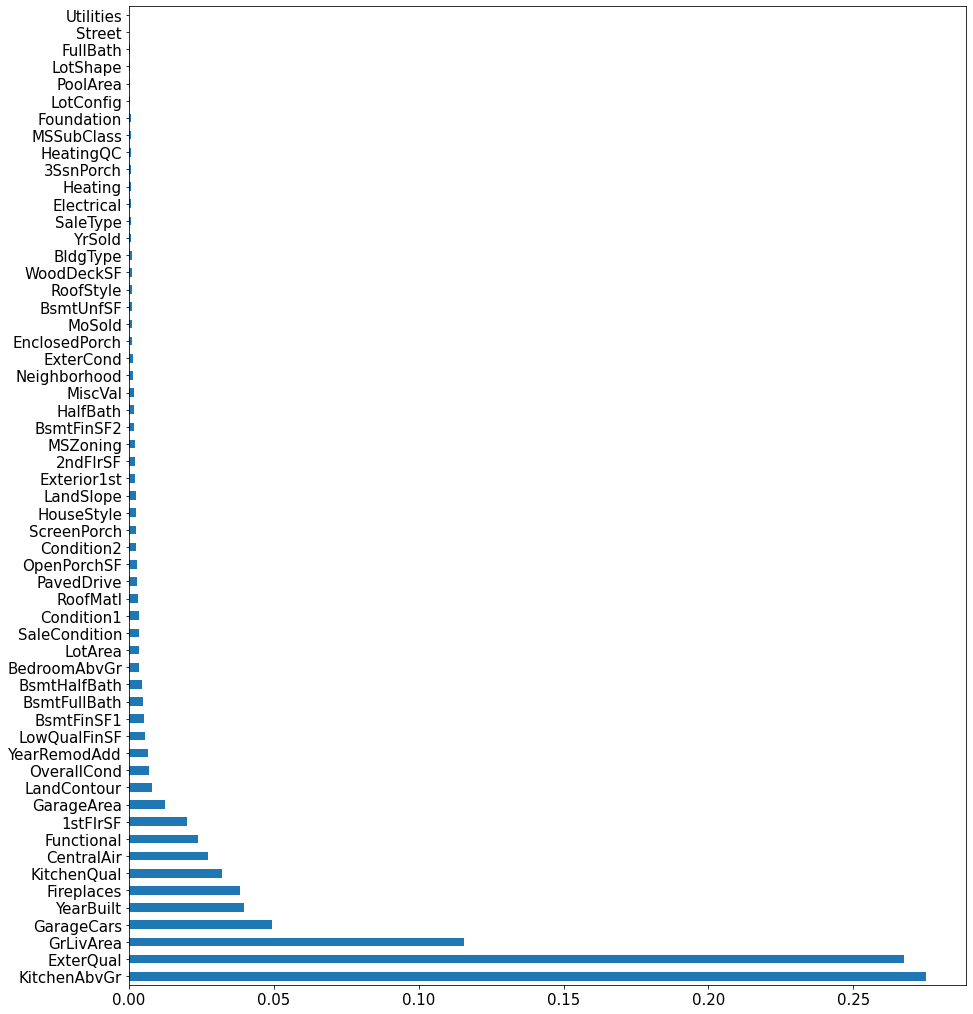

In [48]:
#plloting graph of features importances for better visualization
plt.figure(figsize=(15,18))
imp_fet=pd.Series(xgb.feature_importances_,index=x.columns)
imp_fet.nlargest(57).plot(kind='barh')
plt.show()

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.80,random_state=64)

In [50]:
pred=xgb.predict(x_test)

In [51]:
pred

array([ 1.94062134e+02,  4.28330383e+02,  4.38751335e+01,  8.30544662e+01,
        4.48126984e+02,  2.65567627e+02,  5.42020508e+02,  2.20190292e+02,
        3.76380501e+01,  2.31162064e+02,  3.28375763e+02,  1.94496170e+02,
        3.91019958e+02,  1.54413620e+02,  5.00408691e+02,  2.66254242e+02,
        2.95989868e+02,  4.82316620e+02,  4.04074890e+02,  1.33070099e+02,
        1.18177533e+00,  2.35437012e+02,  1.74680115e+02,  1.50349686e+02,
        1.05719444e+02,  3.40610626e+02,  3.35177094e+02,  4.14636444e+02,
        1.22272781e+02,  4.88817169e+02,  4.89760284e+02,  1.12107382e+01,
        3.17033203e+02,  3.33216461e+02,  4.68175323e+02,  4.25411530e+02,
        1.58505600e+02,  3.19615295e+02,  2.70824921e+02,  2.71540863e+02,
        1.19790085e+02,  4.79451447e+01,  1.10218712e+02,  4.12757538e+02,
        4.79964996e+02,  1.75757187e+02,  3.74217377e+02,  2.32851624e+02,
        1.69292542e+02,  6.91931610e+01,  1.88698700e+02,  1.11690880e+02,
        8.86204376e+01,  

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test,pred)

0.9997657407627537

In [71]:
xgb.score(x_train,y_train)

0.9997344426414205

In [70]:
xgb.score(x_test,y_test)

0.9997657407627537

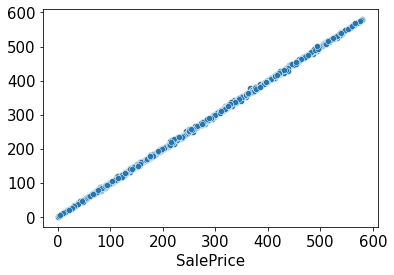

In [72]:
sns.scatterplot(y_test,pred)
plt.show()

# using RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [55]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
y_pred=rf.predict(x_test)

In [57]:
y_pred

array([253.4 , 454.95, 163.55, 104.56, 415.06, 318.05, 506.16, 226.97,
       105.74, 253.82, 346.09, 183.52, 365.04, 177.11, 371.97, 234.56,
       297.36, 500.71, 321.43, 106.38,  47.48, 219.25, 221.13, 128.63,
        85.09, 370.54, 289.38, 395.29, 187.53, 476.19, 468.89,  61.03,
       248.88, 343.38, 478.81, 307.98, 140.88, 294.73, 218.46, 328.58,
       157.69,  75.05, 168.81, 217.6 , 418.63, 178.46, 326.69, 300.34,
       194.4 , 134.99, 179.61,  84.  , 109.89, 225.79, 420.04, 181.8 ,
       141.  , 390.66, 408.75, 240.15, 229.39, 459.03, 328.58, 261.27,
       303.62, 404.45, 111.94, 363.96, 256.13, 206.27, 115.47, 365.73,
       230.17,  82.95, 199.05, 433.83,  90.04, 546.51, 249.79, 435.74,
       236.89, 317.62, 337.52, 355.71,  82.48, 512.94, 325.97, 250.65,
       304.64, 409.62, 353.39, 170.05, 536.07,  50.9 ,  94.95, 280.41,
       123.95, 222.23, 392.97, 263.26, 465.72, 191.79, 195.59, 354.26,
       163.6 , 361.9 , 185.88, 274.25, 144.56, 204.46, 168.03, 134.63,
      

In [58]:
rf.score(x_train,y_train)

0.978365831232413

In [59]:
rf.score(x_test,y_test)

0.838030287121882

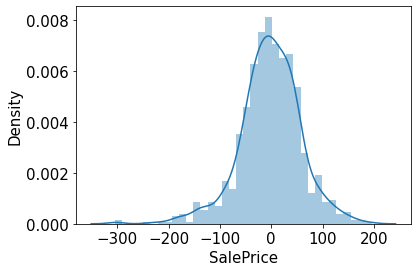

In [60]:
sns.distplot(y_test-y_pred)
plt.show()

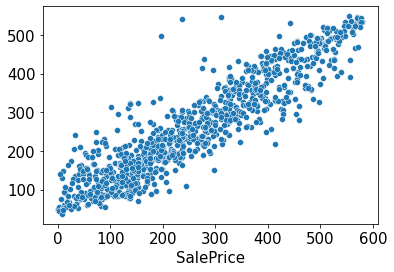

In [73]:
sns.scatterplot(y_test,y_pred)
plt.show()

In [61]:
r2_score(y_test,y_pred)

0.838030287121882

# using LinearRegression

In [62]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [65]:
r_pred=regression.predict(x_test)
r_pred

array([285.81043768, 500.27460349, 102.82677809,  92.83055178,
       337.99298096, 305.03654395, 544.74793245, 177.12261143,
        11.23453257, 280.09316831, 333.92118752, 184.31064762,
       398.2138358 , 170.74284161, 452.65288833, 259.79378338,
       373.83291309, 505.80232171, 330.63952009, 108.89666911,
        -8.19049824, 263.32495475, 235.90591114, 121.43823882,
        86.28674486, 354.27665298, 321.01006477, 361.05891442,
        81.81730408, 479.92942953, 470.0996708 , -35.9601835 ,
       250.6405895 , 340.72836276, 462.80434329, 346.99353147,
       187.0090854 , 325.8853498 , 300.98237956, 332.84308066,
       119.2173643 ,  33.01764222, 186.65976796, 246.71446669,
       419.53892219, 155.45465418, 325.1889239 , 275.43490654,
       141.96581322,  47.76480911, 201.79831487,  70.31781947,
        85.84625509, 223.05031351, 375.24963098, 183.57851053,
       156.9102375 , 360.58284703, 431.54829491, 309.9594656 ,
       244.17679923, 440.80012343, 373.01927511, 248.09

In [66]:
regression.score(x_train,y_train)

0.9021333653317247

In [68]:
regression.score(x_test,y_test)

0.8992259983489196

In [76]:
r2_score(y_test,r_pred)

0.8992259983489196

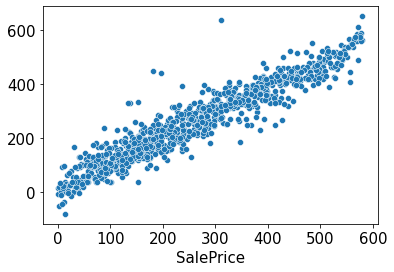

In [74]:
sns.scatterplot(y_test,r_pred)
plt.show()

# Saving the XtreamGradientBoost model to reuse

In [85]:
import pickle
file='saleprice_xgb.pkl'
pickle.dump(xgb,open(file,'wb'))

In [86]:
load=pickle.load(open(file,'rb'))

In [87]:
y_prediction=xgb.predict(x_test)

In [88]:
r2_score(y_test,y_prediction)

0.9997657407627537

# Using Ridge and Lasso to check the overfitted data

In [89]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [92]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [95]:
ridgecv.alpha_

0.09099999999999998

In [97]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [98]:
ridge_model.score(x_test,y_test)

0.86079259123181

In [101]:
#Using Lasso
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)

In [102]:
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [103]:
alpha=lasscv.alpha_
alpha

0.19029323050392974

In [106]:
lasso_xgb=Lasso(alpha)
lasso_xgb.fit(x_train,y_train)

Lasso(alpha=0.19029323050392974)

In [105]:
lasso_xgb.score(x_test,y_test)

0.8634425290558706

Look like our model is only 13 % overfitted with xgb and  3% overfitted with LinearRegression